In [ ]:
!pip install roboflow
!pip install ultralytics

from roboflow import Roboflow
rf = Roboflow(api_key="BQwDvfTN7YuIr2kEqogm")
project = rf.workspace().project("test-ecgss")
model = project.version(1).model

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!unzip '/content/cv_query_jpg.zip'

In [ ]:
!mkdir -p /content/test

In [ ]:
import os
path_close = '/content/cv_query_jpg/close/'
path_normal = '/content/cv_query_jpg/normal/'
path_far = '/content/cv_query_jpg/far/'
query_close_names = os.listdir(path_close)
query_normal_names = os.listdir(path_normal)
query_far_names = os.listdir(path_far)

In [ ]:
queries_normal_paths = [path_normal + name for name in query_normal_names]
queries_close_paths = [path_close + name for name in query_close_names]
queries_far_paths = [path_far + name for name in query_far_names]

In [ ]:
queries_normal_paths

['/content/cv_query_jpg/normal/query_15.jpg',
 '/content/cv_query_jpg/normal/query_16.jpg',
 '/content/cv_query_jpg/normal/query_11.jpg',
 '/content/cv_query_jpg/normal/query_5.jpg',
 '/content/cv_query_jpg/normal/query_2.jpg']

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
boxes_arr = []
labels_arr = []
for close in queries_close_paths:
  boxes = []
  labels = []
  result = model.predict(close)
  for res in result:
    x, y, width, height =  res['x']-res['width']//2,res['y'] - res['height']//2,res['width'] + res['x'],res['height'] + res['y']
    box_voc = (x,y,width,height)
    boxes.append(box_voc)
    labels.append(res['class'])
  boxes_arr.append(boxes)
  labels_arr.append(labels)

In [ ]:
def plot_image_with_boxes(image,boxes,title='Query Cards',cards=None):
  plt.figure(figsize=(15, 10))
  im = image.copy()
  for i in range(len(boxes)):
    cv2.rectangle(im,(boxes[i][0],boxes[i][1]),(boxes[i][2],boxes[i][3]),(255,255,0),25)
    if cards is not None:
      cv2.putText(im, cards[i], (boxes[i][2], boxes[i][3]-10), cv2.FONT_HERSHEY_SIMPLEX, 5, (36,255,12), 5)
  if cards is None:
    plt.title(title)
  plt.axis('off')
  plt.imshow(im)
  plt.show();

In [ ]:
images_close = [plt.imread(close) for close in queries_close_paths]

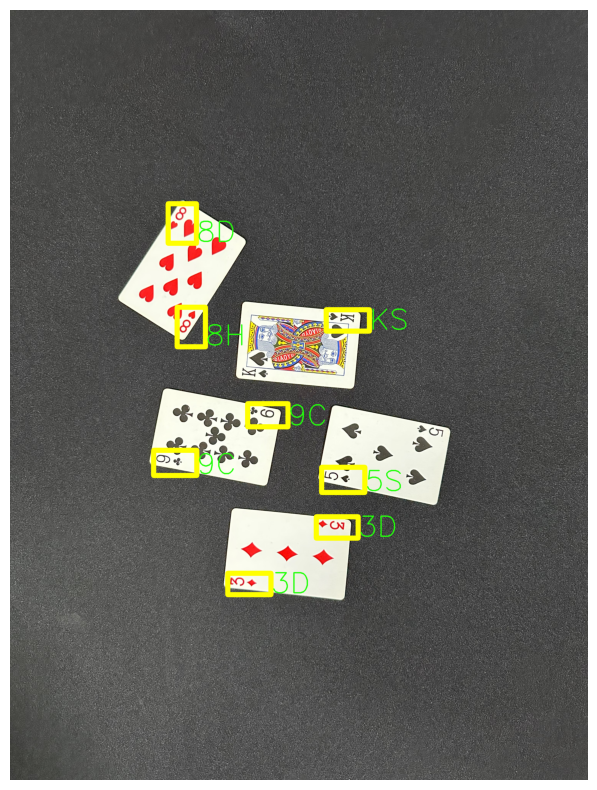

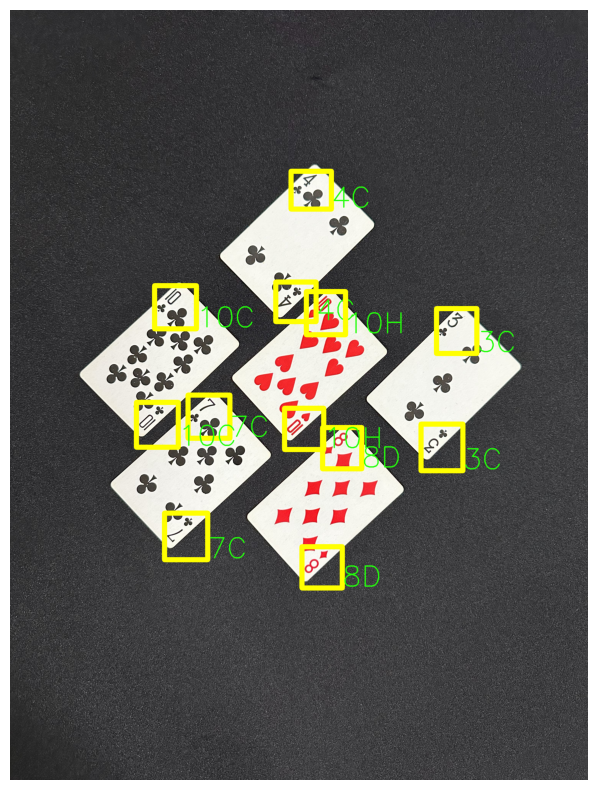

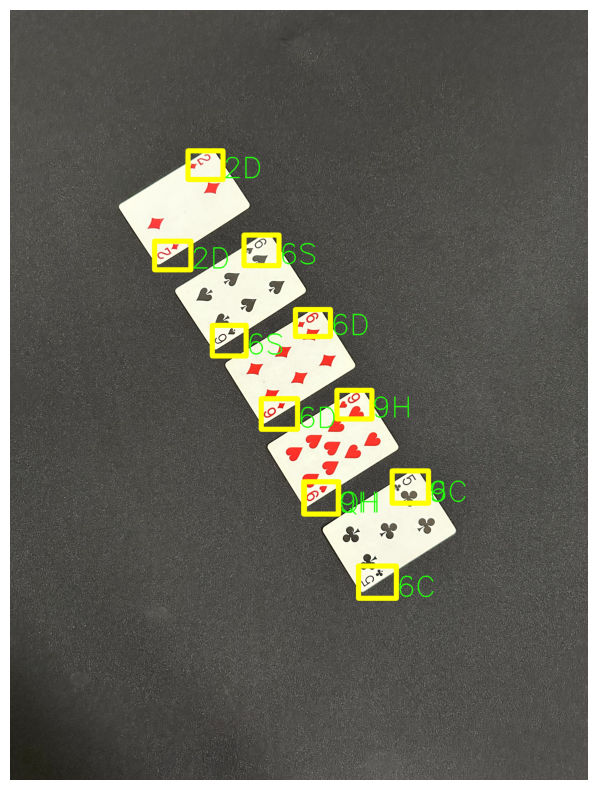

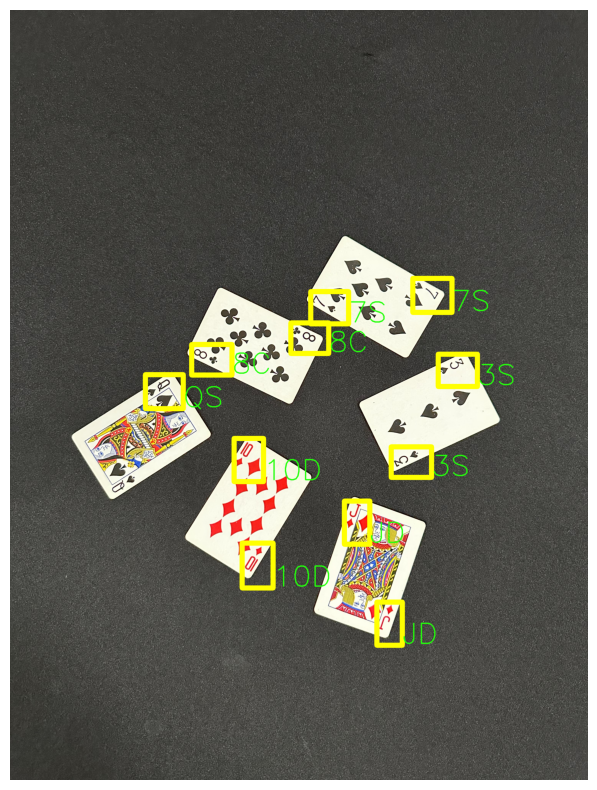

In [ ]:
for i in range(len(images_close)):
  plot_image_with_boxes(images_close[i], boxes_arr[i],cards = labels_arr[i])

In [ ]:
boxes_arr = []
labels_arr = []
for close in queries_normal_paths:
  boxes = []
  labels = []
  result = model.predict(close)
  for res in result:
    x, y, width, height =  res['x']-res['width']//2,res['y'] - res['height']//2,res['width'] + res['x'],res['height'] + res['y']
    box_voc = (x,y,width,height)
    boxes.append(box_voc)
    labels.append(res['class'])
  boxes_arr.append(boxes)
  labels_arr.append(labels)

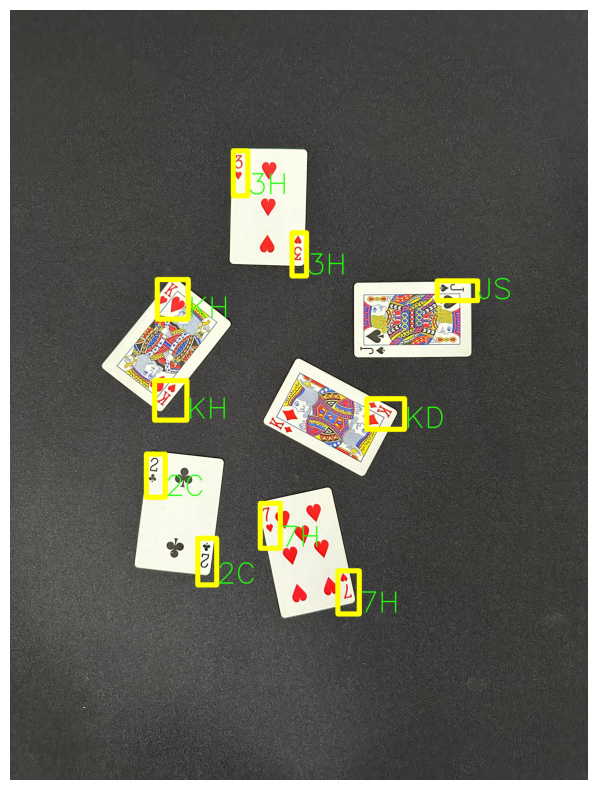

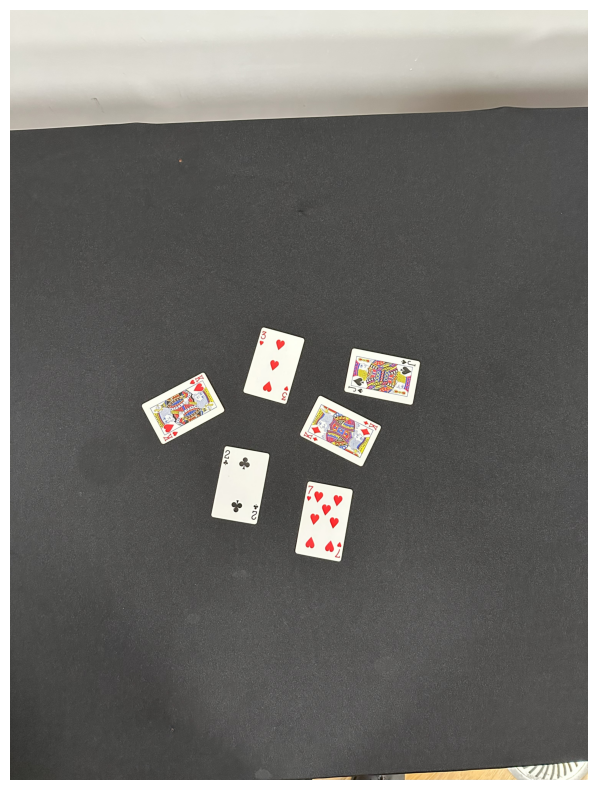

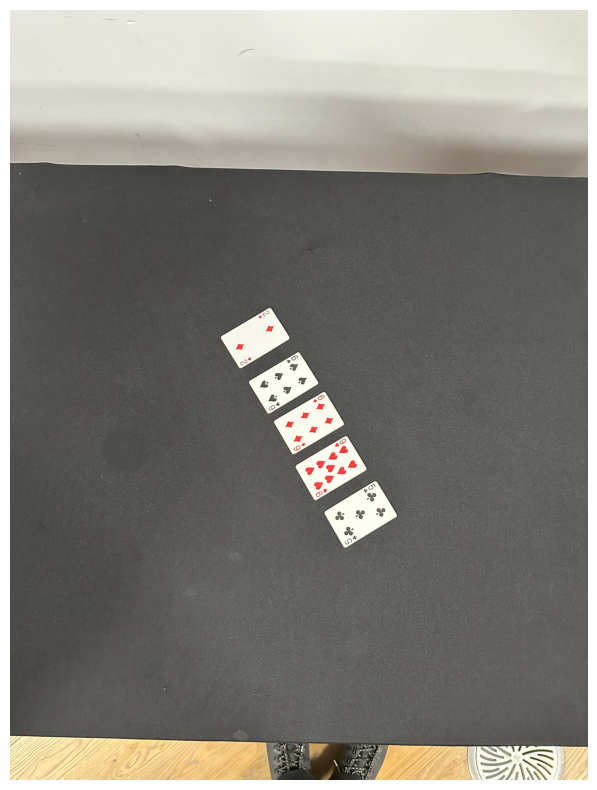

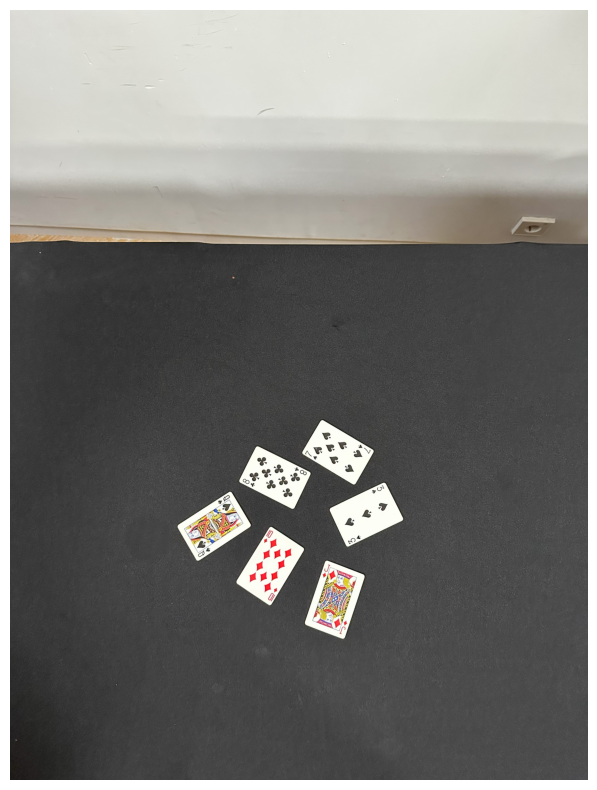

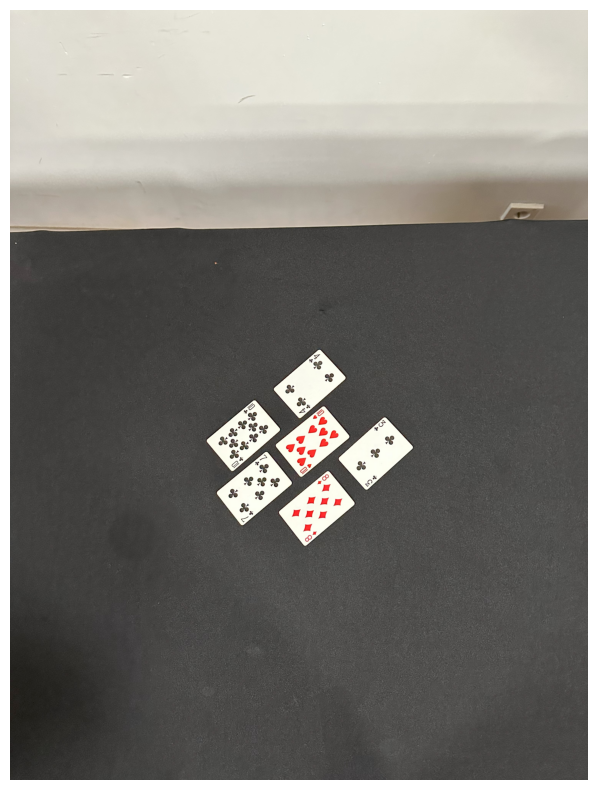

In [ ]:
images_normal = [plt.imread(normal) for normal in queries_normal_paths]
for i in range(len(images_normal)):
  plot_image_with_boxes(images_normal[i], boxes_arr[i],cards = labels_arr[i])

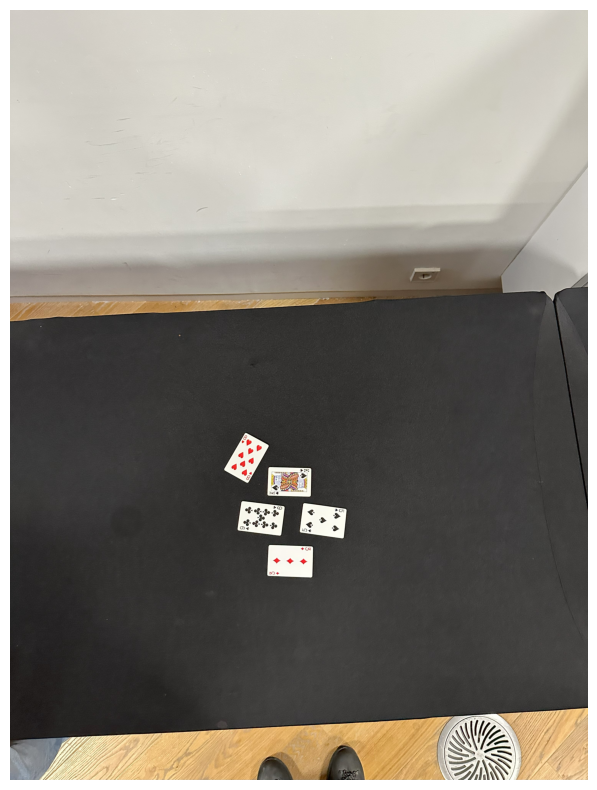

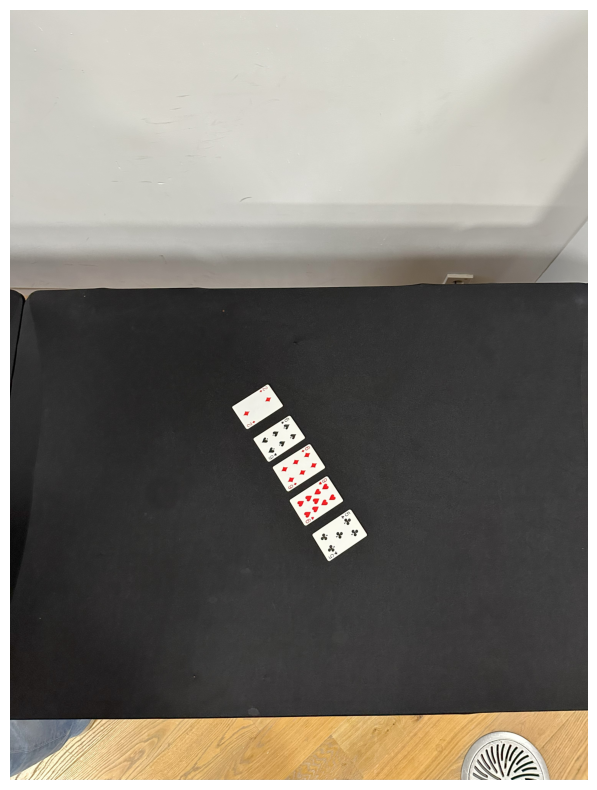

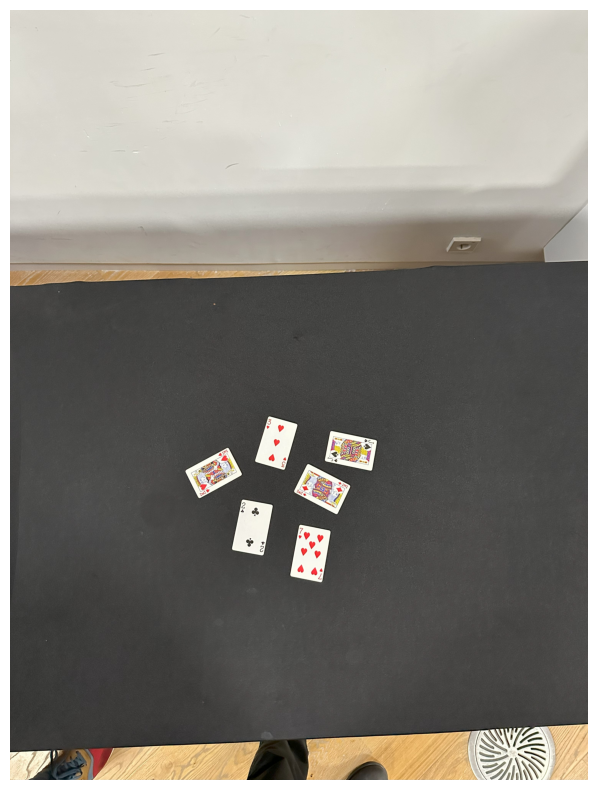

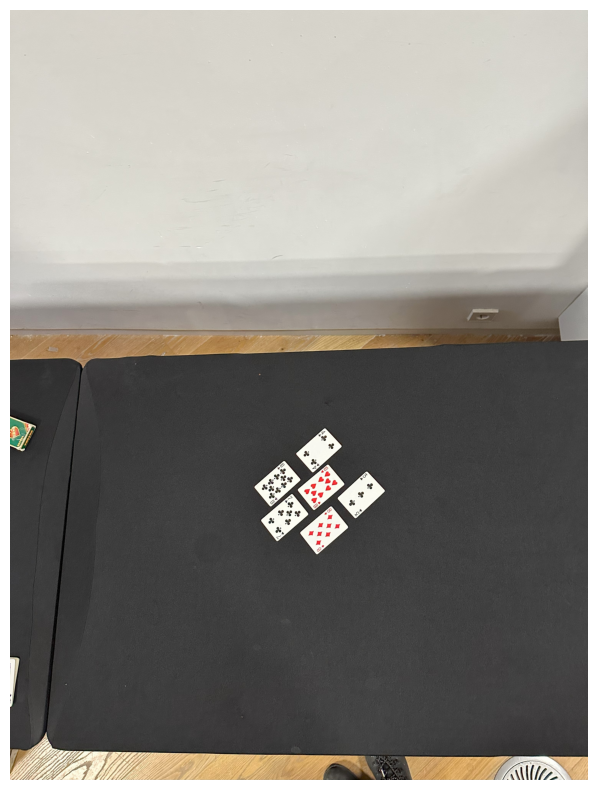

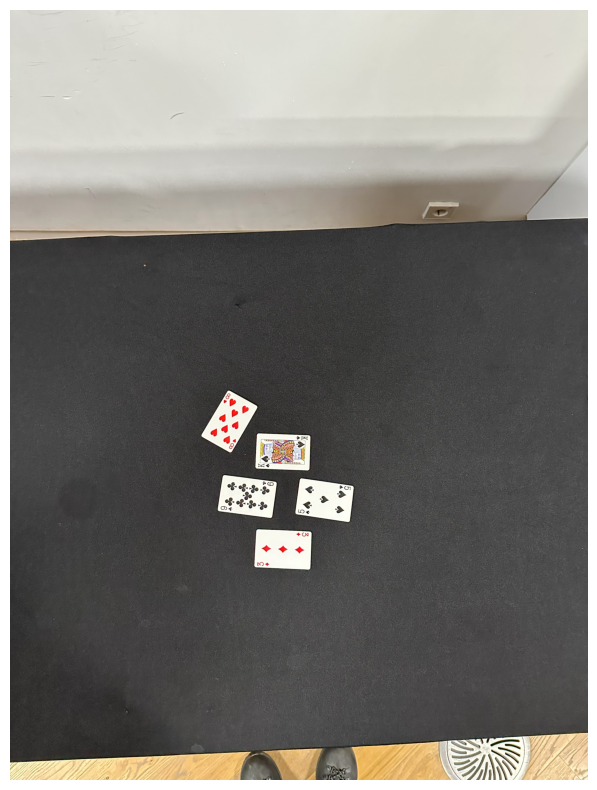

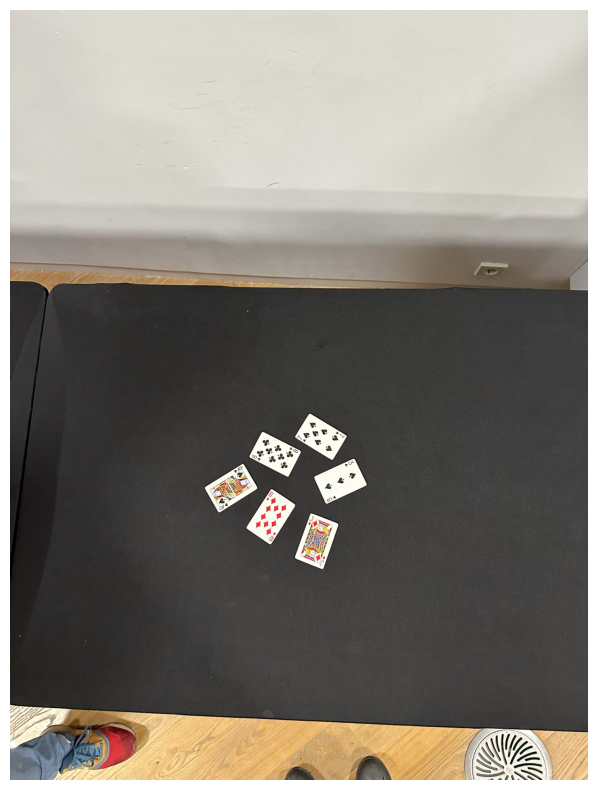

In [ ]:
boxes_arr = []
labels_arr = []
for close in queries_far_paths:
  boxes = []
  labels = []
  result = model.predict(close)
  for res in result:
    x, y, width, height =  res['x']-res['width']//2,res['y'] - res['height']//2,res['width'] + res['x'],res['height'] + res['y']
    box_voc = (x,y,width,height)
    boxes.append(box_voc)
    labels.append(res['class'])
  boxes_arr.append(boxes)
  labels_arr.append(labels)

images_far = [plt.imread(far) for far in queries_far_paths]
for i in range(len(images_far)):
  plot_image_with_boxes(images_far[i], boxes_arr[i],cards = labels_arr[i])